In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from package.tessellations import get_cubical_tessellation_on_torus2d

In [2]:
n = 10

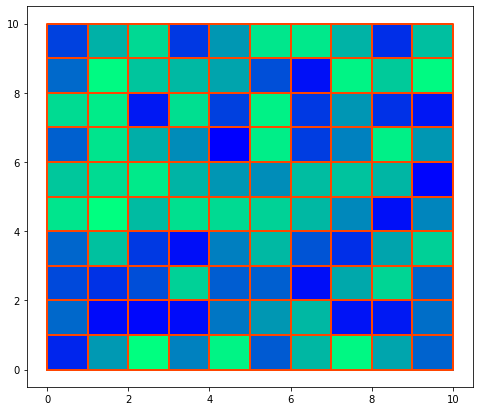

In [3]:
tes = get_cubical_tessellation_on_torus2d(n)
tes.set_filtration(np.random.random(n**2))
tes.initialize_complex(dimension=3)

plt.figure(figsize=(8, 7))
tes.draw_filtration()
plt.show()

In [4]:
info = tes.get_cycle_info()
info

,Birth,Death,Dimension
0,0.059675,0.187851,0
1,0.059940,0.224104,0
2,0.066776,0.309440,0
3,0.029356,0.373053,0
4,0.092096,0.375108,0
5,0.182519,0.389613,0
6,0.397930,0.429019,1
7,0.352670,0.461081,0
8,0.221324,0.505597,0
9,0.022008,0.505951,0


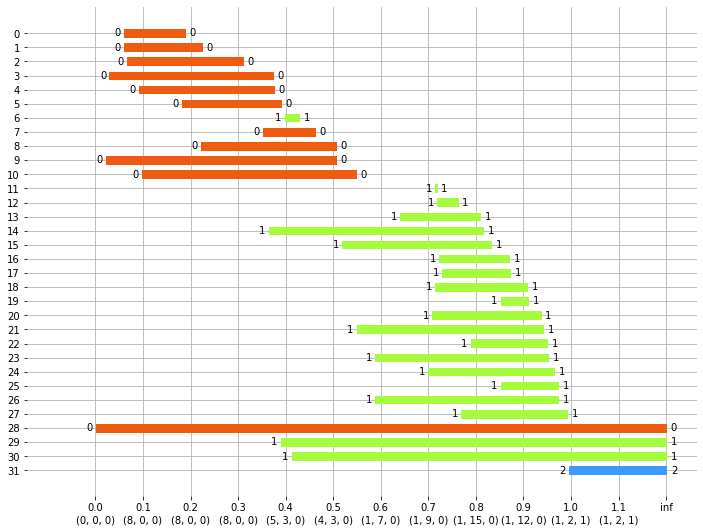

In [5]:
plt.figure(figsize=(12, 9))
plt.scatter(-0.08, 0, alpha=0)
colormap = cm.turbo
for i in range(len(info)):
    birth = info['Birth'].values[i]
    death = info['Death'].values[i]
    dimension = info['Dimension'].values[i]
    #color = colormap(1-i/len(info))
    color = colormap(0.6*(1 - dimension/2) + 0.2)
    if death > 1.2:
        death = 1.2
    for j in np.arange(-0.25, 0.3, 0.01):
        plt.plot([birth, death], -i*np.ones(2) + j, color=color, linewidth=1)
    plt.text(birth - 0.02, -i-0.21, dimension)
    plt.text(death + 0.01, -i-0.21, dimension)

ytiks = -np.arange(len(info))
ylabels = abs(ytiks)
plt.yticks(ytiks, ylabels)

xtiks = np.round(np.arange(0, 1.3, 0.1), 1)
xlabels = np.char.add(xtiks.astype(str), '\n')
xlabels[xtiks == 1.2] = 'inf'
xlabels[xtiks != 1.2] = np.char.add(xlabels[xtiks != 1.2], ['({0})'.format(str(tes.simplextree.persistent_betti_numbers(val, val))[1:-1]) for val in xtiks[xtiks != 1.2]])
plt.xticks(xtiks, xlabels)

plt.grid(True)
plt.box(False)
plt.show()